<a href="https://colab.research.google.com/github/harshu722/ML-AI-personal-1/blob/main/ML_AI_Model_for_Defence_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install tensorflow scikit-learn numpy pandas matplotlib


In [2]:
# Importing Libraries
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Simulated Radar Data (for simplicity, we'll use random numbers)
# Features: [Speed, Size, Trajectory Angle, Distance]
np.random.seed(42)
data_size = 1000
X = np.random.rand(data_size, 4)  # Simulated radar features
y = np.random.randint(0, 2, data_size)  # Binary classification: 0 (non-threat), 1 (threat)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train RandomForest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Model Accuracy: {accuracy * 100:.2f}%")

Random Forest Model Accuracy: 56.50%


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 96s 48ms/step - accuracy: 0.8928 - loss: 0.3372 - val_accuracy: 0.9802 - val_loss: 0.0606
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 115s 34ms/step - accuracy: 0.9851 - loss: 0.0481 - val_accuracy: 0.9894 - val_loss: 0.0345
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 34ms/step - accuracy: 0.9898 - loss: 0.0323 - val_accuracy: 0.9899 - val_loss: 0.0329
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 34ms/step - accuracy: 0.9918 - loss: 0.0247 - val_accuracy: 0.9869 - val_loss: 0.0363
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 34ms/step - accuracy: 0.9945 - loss: 0.0176 - val_accuracy: 0.9916 - val_loss: 0.0269
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.9896 - loss: 0.0298
Test Accuracy: 99.16%


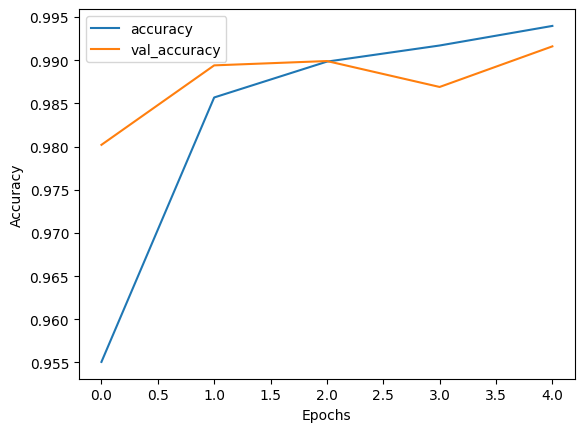

In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

# Load MNIST dataset (as a proxy for radar image data)
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Preprocess the data (normalize and reshape)
X_train = X_train / 255.0
X_test = X_test / 255.0
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# Define the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 classes for MNIST digits (0-9)
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

# Plot accuracy over epochs
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [4]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Simulating rocket data (features: speed, size, trajectory_angle, distance)
np.random.seed(42)
data_size = 1000
# Simulated data: [Speed, Size, Trajectory Angle, Distance]
X = np.random.rand(data_size, 4) * [500, 50, 180, 100]  # Sample values
y = np.random.randint(0, 2, data_size)  # 0 = Non-threat, 1 = Threat

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions and evaluate accuracy
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Threat Classification Accuracy: {accuracy * 100:.2f}%")


Threat Classification Accuracy: 56.50%


In [5]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np

# Simulated interception data
# Features: [Rocket Speed, Rocket Trajectory Angle, Distance, Interceptor Speed]
X_intercept = np.random.rand(data_size, 4) * [500, 180, 100, 300]
# Target: Optimal Launch Angle (for simplicity, let's assume it's between 0 and 180 degrees)
y_intercept = np.random.rand(data_size) * 180  # Random angles between 0-180 degrees

# Split the data into training and testing sets
X_train_intercept, X_test_intercept, y_train_intercept, y_test_intercept = train_test_split(X_intercept, y_intercept, test_size=0.2, random_state=42)

# Build a simple neural network for predicting launch parameters
model = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(4,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)  # Output: Optimal launch angle
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train_intercept, y_train_intercept, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model
loss = model.evaluate(X_test_intercept, y_test_intercept)
print(f'Interception Model Loss (MSE): {loss:.4f}')

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 13926.4873 - val_loss: 2619.5300
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3434.7744 - val_loss: 2412.1174
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3511.6702 - val_loss: 2371.4729
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3290.4727 - val_loss: 2343.7769
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3218.1880 - val_loss: 2331.4968
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2809.1245 - val_loss: 2331.5054
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3004.9670 - val_loss: 2332.1799
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2767.2964 - val_loss: 2320.8196
Epoch 9/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2976.0505 - val_loss: 2347.8594
Epoch 10/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2827.6035 - val_loss: 2318.9746
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3488.5706  
Interception Model Loss (MSE): 3316.3438


In [6]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np

# Simulate radar data as images (for example, 64x64 pixels of radar signatures)
radar_data = np.random.rand(1000, 64, 64, 1)  # 1000 samples of 64x64 radar data
labels = np.random.randint(0, 2, 1000)  # Binary classification: 0 = non-threat, 1 = threat

# CNN for radar data classification
cnn_model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Output: Binary classification (threat or non-threat)
])

cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the CNN model
cnn_model.fit(radar_data, labels, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the CNN model
accuracy = cnn_model.evaluate(radar_data, labels)
print(f"Threat Identification Accuracy: {accuracy[1] * 100:.2f}%")

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 8s 244ms/step - accuracy: 0.4667 - loss: 0.7038 - val_accuracy: 0.5850 - val_loss: 0.6930
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 9s 185ms/step - accuracy: 0.5396 - loss: 0.6941 - val_accuracy: 0.5450 - val_loss: 0.6931
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 258ms/step - accuracy: 0.5286 - loss: 0.6932 - val_accuracy: 0.5500 - val_loss: 0.6930
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 201ms/step - accuracy: 0.5060 - loss: 0.6931 - val_accuracy: 0.4700 - val_loss: 0.6933
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 289ms/step - accuracy: 0.5190 - loss: 0.6930 - val_accuracy: 0.5350 - val_loss: 0.6929
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 8s 185ms/step - accuracy: 0.5287 - loss: 0.6932 - val_accuracy: 0.4700 - val_loss: 0.6934
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 239ms/step - accuracy: 0.5117 - loss: 0.6927 - val_accuracy: 0.4700 - val_loss: 0.6936
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 9s 186ms/step - accuracy: 0.5054 - loss: 0.6924 - val_accuracy: 0.4700 - val_

In [7]:
# Simulate time-series trajectory data (1000 sequences of 10 time steps with 4 features)
trajectory_data = np.random.rand(1000, 10, 4)  # [Speed, Angle, Distance, Altitude] over time
target_impact = np.random.rand(1000, 1)  # Target impact point

# LSTM Model for Trajectory Prediction
lstm_model = models.Sequential([
    layers.LSTM(64, return_sequences=True, input_shape=(10, 4)),
    layers.LSTM(64),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)  # Predict the impact point
])

lstm_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the LSTM model
lstm_model.fit(trajectory_data, target_impact, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model
loss = lstm_model.evaluate(trajectory_data, target_impact)
print(f"Trajectory Prediction Loss (MSE): {loss:.4f}")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.1830 - val_loss: 0.0924
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0869 - val_loss: 0.0830
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0882 - val_loss: 0.0782
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0879 - val_loss: 0.0849
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0940 - val_loss: 0.0795
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0852 - val_loss: 0.0789
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0920 - val_loss: 0.0785
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0840 - val_loss: 0.0845
Epoch 9/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0840 - val_loss: 0.0787
Epoch 10/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0873 - val_loss: 0.0805
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0854
Trajectory Prediction Loss (MSE): 0.0853


In [8]:
import gym
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers

# Define a custom environment for interceptor launch (simplified)
class InterceptorEnv(gym.Env):
    def __init__(self):
        super(InterceptorEnv, self).__init__()
        # State: [rocket speed, distance, launch decision (0 or 1)]
        self.observation_space = gym.spaces.Box(low=0, high=1, shape=(3,), dtype=np.float32)
        self.action_space = gym.spaces.Discrete(2)  # 0 = no launch, 1 = launch
        self.state = np.array([0.5, 0.5, 0])  # Initial state
        self.done = False

    def reset(self):
        self.state = np.array([0.5, 0.5, 0])  # Reset state
        self.done = False
        return self.state

    def step(self, action):
        speed, distance, _ = self.state
        reward = 0

        # Update state based on action
        if action == 1:  # Launch interceptor
            reward = 1 if distance < 0.2 else -1  # Successful interception
        distance -= speed * 0.1  # Simulate rocket getting closer

        if distance <= 0:
            self.done = True
            reward = -10  # Failed interception

        self.state = np.array([speed, distance, action])
        return self.state, reward, self.done, {}

# Instantiate the environment
env = InterceptorEnv()

# Simple DQN (Deep Q-Network) for learning the interceptor launch policy
def build_dqn_model(input_shape, action_space):
    model = models.Sequential([
        layers.Dense(24, activation='relu', input_shape=input_shape),
        layers.Dense(24, activation='relu'),
        layers.Dense(action_space, activation='linear')
    ])
    return model

# Initialize model and training parameters
dqn_model = build_dqn_model((3,), env.action_space.n)
dqn_model.compile(optimizer='adam', loss='mse')

# Simulate training for RL policy (simplified without full DQN logic)
for episode in range(100):  # Number of episodes
    state = env.reset()
    total_reward = 0
    for step in range(50):  # Max steps per episode
        action = np.random.choice([0, 1])  # Simplified random action (replace with DQN policy)
        next_state, reward, done, _ = env.step(action)
        total_reward += reward
        if done:
            break
    print(f"Episode {episode + 1}: Total Reward: {total_reward}")


Episode 1: Total Reward: -11
Episode 2: Total Reward: -13
Episode 3: Total Reward: -14
Episode 4: Total Reward: -11
Episode 5: Total Reward: -12
Episode 6: Total Reward: -12
Episode 7: Total Reward: -14
Episode 8: Total Reward: -12
Episode 9: Total Reward: -13
Episode 10: Total Reward: -14
Episode 11: Total Reward: -16
Episode 12: Total Reward: -13
Episode 13: Total Reward: -14
Episode 14: Total Reward: -10
Episode 15: Total Reward: -10
Episode 16: Total Reward: -12
Episode 17: Total Reward: -14
Episode 18: Total Reward: -11
Episode 19: Total Reward: -13
Episode 20: Total Reward: -12
Episode 21: Total Reward: -15
Episode 22: Total Reward: -14
Episode 23: Total Reward: -10
Episode 24: Total Reward: -11
Episode 25: Total Reward: -12
Episode 26: Total Reward: -14
Episode 27: Total Reward: -10
Episode 28: Total Reward: -12
Episode 29: Total Reward: -12
Episode 30: Total Reward: -13
Episode 31: Total Reward: -11
Episode 32: Total Reward: -9
Episode 33: Total Reward: -13
Episode 34: Total Re

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
import gym
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers

# Define a custom environment for interceptor launch (simplified)
class InterceptorEnv(gym.Env):
    def __init__(self):
        super(InterceptorEnv, self).__init__()
        # State: [rocket speed, distance, launch decision (0 or 1)]
        self.observation_space = gym.spaces.Box(low=0, high=1, shape=(3,), dtype=np.float32)
        self.action_space = gym.spaces.Discrete(2)  # 0 = no launch, 1 = launch
        self.state = np.array([0.5, 0.5, 0])  # Initial state
        self.done = False

    def reset(self):
        self.state = np.array([0.5, 0.5, 0])  # Reset state
        self.done = False
        return self.state

    def step(self, action):
        speed, distance, _ = self.state
        reward = 0

        # Update state based on action
        if action == 1:  # Launch interceptor
            reward = 1 if distance < 0.2 else -1  # Successful interception
        distance -= speed * 0.1  # Simulate rocket getting closer

        if distance <= 0:
            self.done = True
            reward = -10  # Failed interception

        self.state = np.array([speed, distance, action])
        return self.state, reward, self.done, {}

# Instantiate the environment
env = InterceptorEnv()

# Simple DQN (Deep Q-Network) for learning the interceptor launch policy
def build_dqn_model(input_shape, action_space):
    model = models.Sequential([
        layers.Dense(24, activation='relu', input_shape=input_shape),
        layers.Dense(24, activation='relu'),
        layers.Dense(action_space, activation='linear')
    ])
    return model

# Initialize model and training parameters
dqn_model = build_dqn_model((3,), env.action_space.n)
dqn_model.compile(optimizer='adam', loss='mse')

# Simulate training for RL policy (simplified without full DQN logic)
for episode in range(100):  # Number of episodes
    state = env.reset()
    total_reward = 0
    for step in range(50):  # Max steps per episode
        action = np.random.choice([0, 1])  # Simplified random action (replace with DQN policy)
        next_state, reward, done, _ = env.step(action)
        total_reward += reward
        if done:
            break
    print(f"Episode {episode + 1}: Total Reward: {total_reward}")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Episode 1: Total Reward: -12
Episode 2: Total Reward: -11
Episode 3: Total Reward: -13
Episode 4: Total Reward: -11
Episode 5: Total Reward: -13
Episode 6: Total Reward: -14
Episode 7: Total Reward: -9
Episode 8: Total Reward: -13
Episode 9: Total Reward: -16
Episode 10: Total Reward: -10
Episode 11: Total Reward: -14
Episode 12: Total Reward: -14
Episode 13: Total Reward: -9
Episode 14: Total Reward: -13
Episode 15: Total Reward: -12
Episode 16: Total Reward: -10
Episode 17: Total Reward: -11
Episode 18: Total Reward: -12
Episode 19: Total Reward: -14
Episode 20: Total Reward: -14
Episode 21: Total Reward: -12
Episode 22: Total Reward: -12
Episode 23: Total Reward: -12
Episode 24: Total Reward: -8
Episode 25: Total Reward: -12
Episode 26: Total Reward: -15
Episode 27: Total Reward: -10
Episode 28: Total Reward: -10
Episode 29: Total Reward: -12
Episode 30: Total Reward: -13
Episode 31: Total Reward: -13
Episode 32: Total Reward: -14
Episode 33: Total Reward: -13
Episode 34: Total Rewa

In [10]:
import gym
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers

# Define a custom environment for interceptor launch (simplified)
class InterceptorEnv(gym.Env):
    def __init__(self):
        super(InterceptorEnv, self).__init__()
        # State: [rocket speed, distance, launch decision (0 or 1)]
        self.observation_space = gym.spaces.Box(low=0, high=1, shape=(3,), dtype=np.float32)
        self.action_space = gym.spaces.Discrete(2)  # 0 = no launch, 1 = launch
        self.state = np.array([0.5, 0.5, 0])  # Initial state
        self.done = False

    def reset(self):
        self.state = np.array([0.5, 0.5, 0])  # Reset state
        self.done = False
        return self.state

    def step(self, action):
        speed, distance, _ = self.state
        reward = 0

        # Update state based on action
        if action == 1:  # Launch interceptor
            reward = 1 if distance < 0.2 else -1  # Successful interception
        distance -= speed * 0.1  # Simulate rocket getting closer

        if distance <= 0:
            self.done = True
            reward = -10  # Failed interception

        self.state = np.array([speed, distance, action])
        return self.state, reward, self.done, {}

# Instantiate the environment
env = InterceptorEnv()

# Simple DQN (Deep Q-Network) for learning the interceptor launch policy
def build_dqn_model(input_shape, action_space):
    model = models.Sequential([
        layers.Dense(24, activation='relu', input_shape=input_shape),
        layers.Dense(24, activation='relu'),
        layers.Dense(action_space, activation='linear')
    ])
    return model

# Initialize model and training parameters
dqn_model = build_dqn_model((3,), env.action_space.n)
dqn_model.compile(optimizer='adam', loss='mse')

# Simulate training for RL policy (simplified without full DQN logic)
for episode in range(100):  # Number of episodes
    state = env.reset()
    total_reward = 0
    for step in range(50):  # Max steps per episode
        action = np.random.choice([0, 1])  # Simplified random action (replace with DQN policy)
        next_state, reward, done, _ = env.step(action)
        total_reward += reward
        if done:
            break
    print(f"Episode {episode + 1}: Total Reward: {total_reward}")


Episode 1: Total Reward: -12
Episode 2: Total Reward: -12
Episode 3: Total Reward: -11
Episode 4: Total Reward: -12
Episode 5: Total Reward: -15
Episode 6: Total Reward: -11
Episode 7: Total Reward: -15
Episode 8: Total Reward: -10
Episode 9: Total Reward: -15
Episode 10: Total Reward: -9
Episode 11: Total Reward: -10
Episode 12: Total Reward: -10
Episode 13: Total Reward: -11
Episode 14: Total Reward: -12
Episode 15: Total Reward: -10
Episode 16: Total Reward: -9
Episode 17: Total Reward: -11
Episode 18: Total Reward: -10
Episode 19: Total Reward: -15
Episode 20: Total Reward: -9
Episode 21: Total Reward: -9
Episode 22: Total Reward: -10
Episode 23: Total Reward: -13
Episode 24: Total Reward: -15
Episode 25: Total Reward: -15
Episode 26: Total Reward: -11
Episode 27: Total Reward: -12
Episode 28: Total Reward: -10
Episode 29: Total Reward: -15
Episode 30: Total Reward: -13
Episode 31: Total Reward: -11
Episode 32: Total Reward: -11
Episode 33: Total Reward: -12
Episode 34: Total Rewar